In [3]:
#Inspired by fast.ai Practical Deep Learning for Coders(v3) lession 1

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [21]:
!pwd #helps you find the directory of the notebook

/home/adeeb/Desktop/Kaggly Experiments


In [7]:
from fastai.vision import *
from fastai.metrics import error_rate

In [8]:
bs = 64
bptt=8

In [9]:
import numpy as np
import pandas as pd

import os
print(os.listdir('/home/adeeb/Desktop/Kaggly Experiments/stanford-car-dataset-by-classes-folder/car_data'))

['train', 'test']


In [10]:
data_dir='/home/adeeb/Desktop/Kaggly Experiments/stanford-car-dataset-by-classes-folder/car_data'

list = os.listdir(data_dir) 
number_files = len(list)
print(number_files)

2


In [11]:
path=Path(data_dir)
path

PosixPath('/home/adeeb/Desktop/Kaggly Experiments/stanford-car-dataset-by-classes-folder/car_data')

In [12]:
data = ImageDataBunch.from_folder(path,  
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(do_flip=True,flip_vert=False, max_rotate=90),
                                  size=224,bs=64, 
                                  num_workers=0).normalize(imagenet_stats)

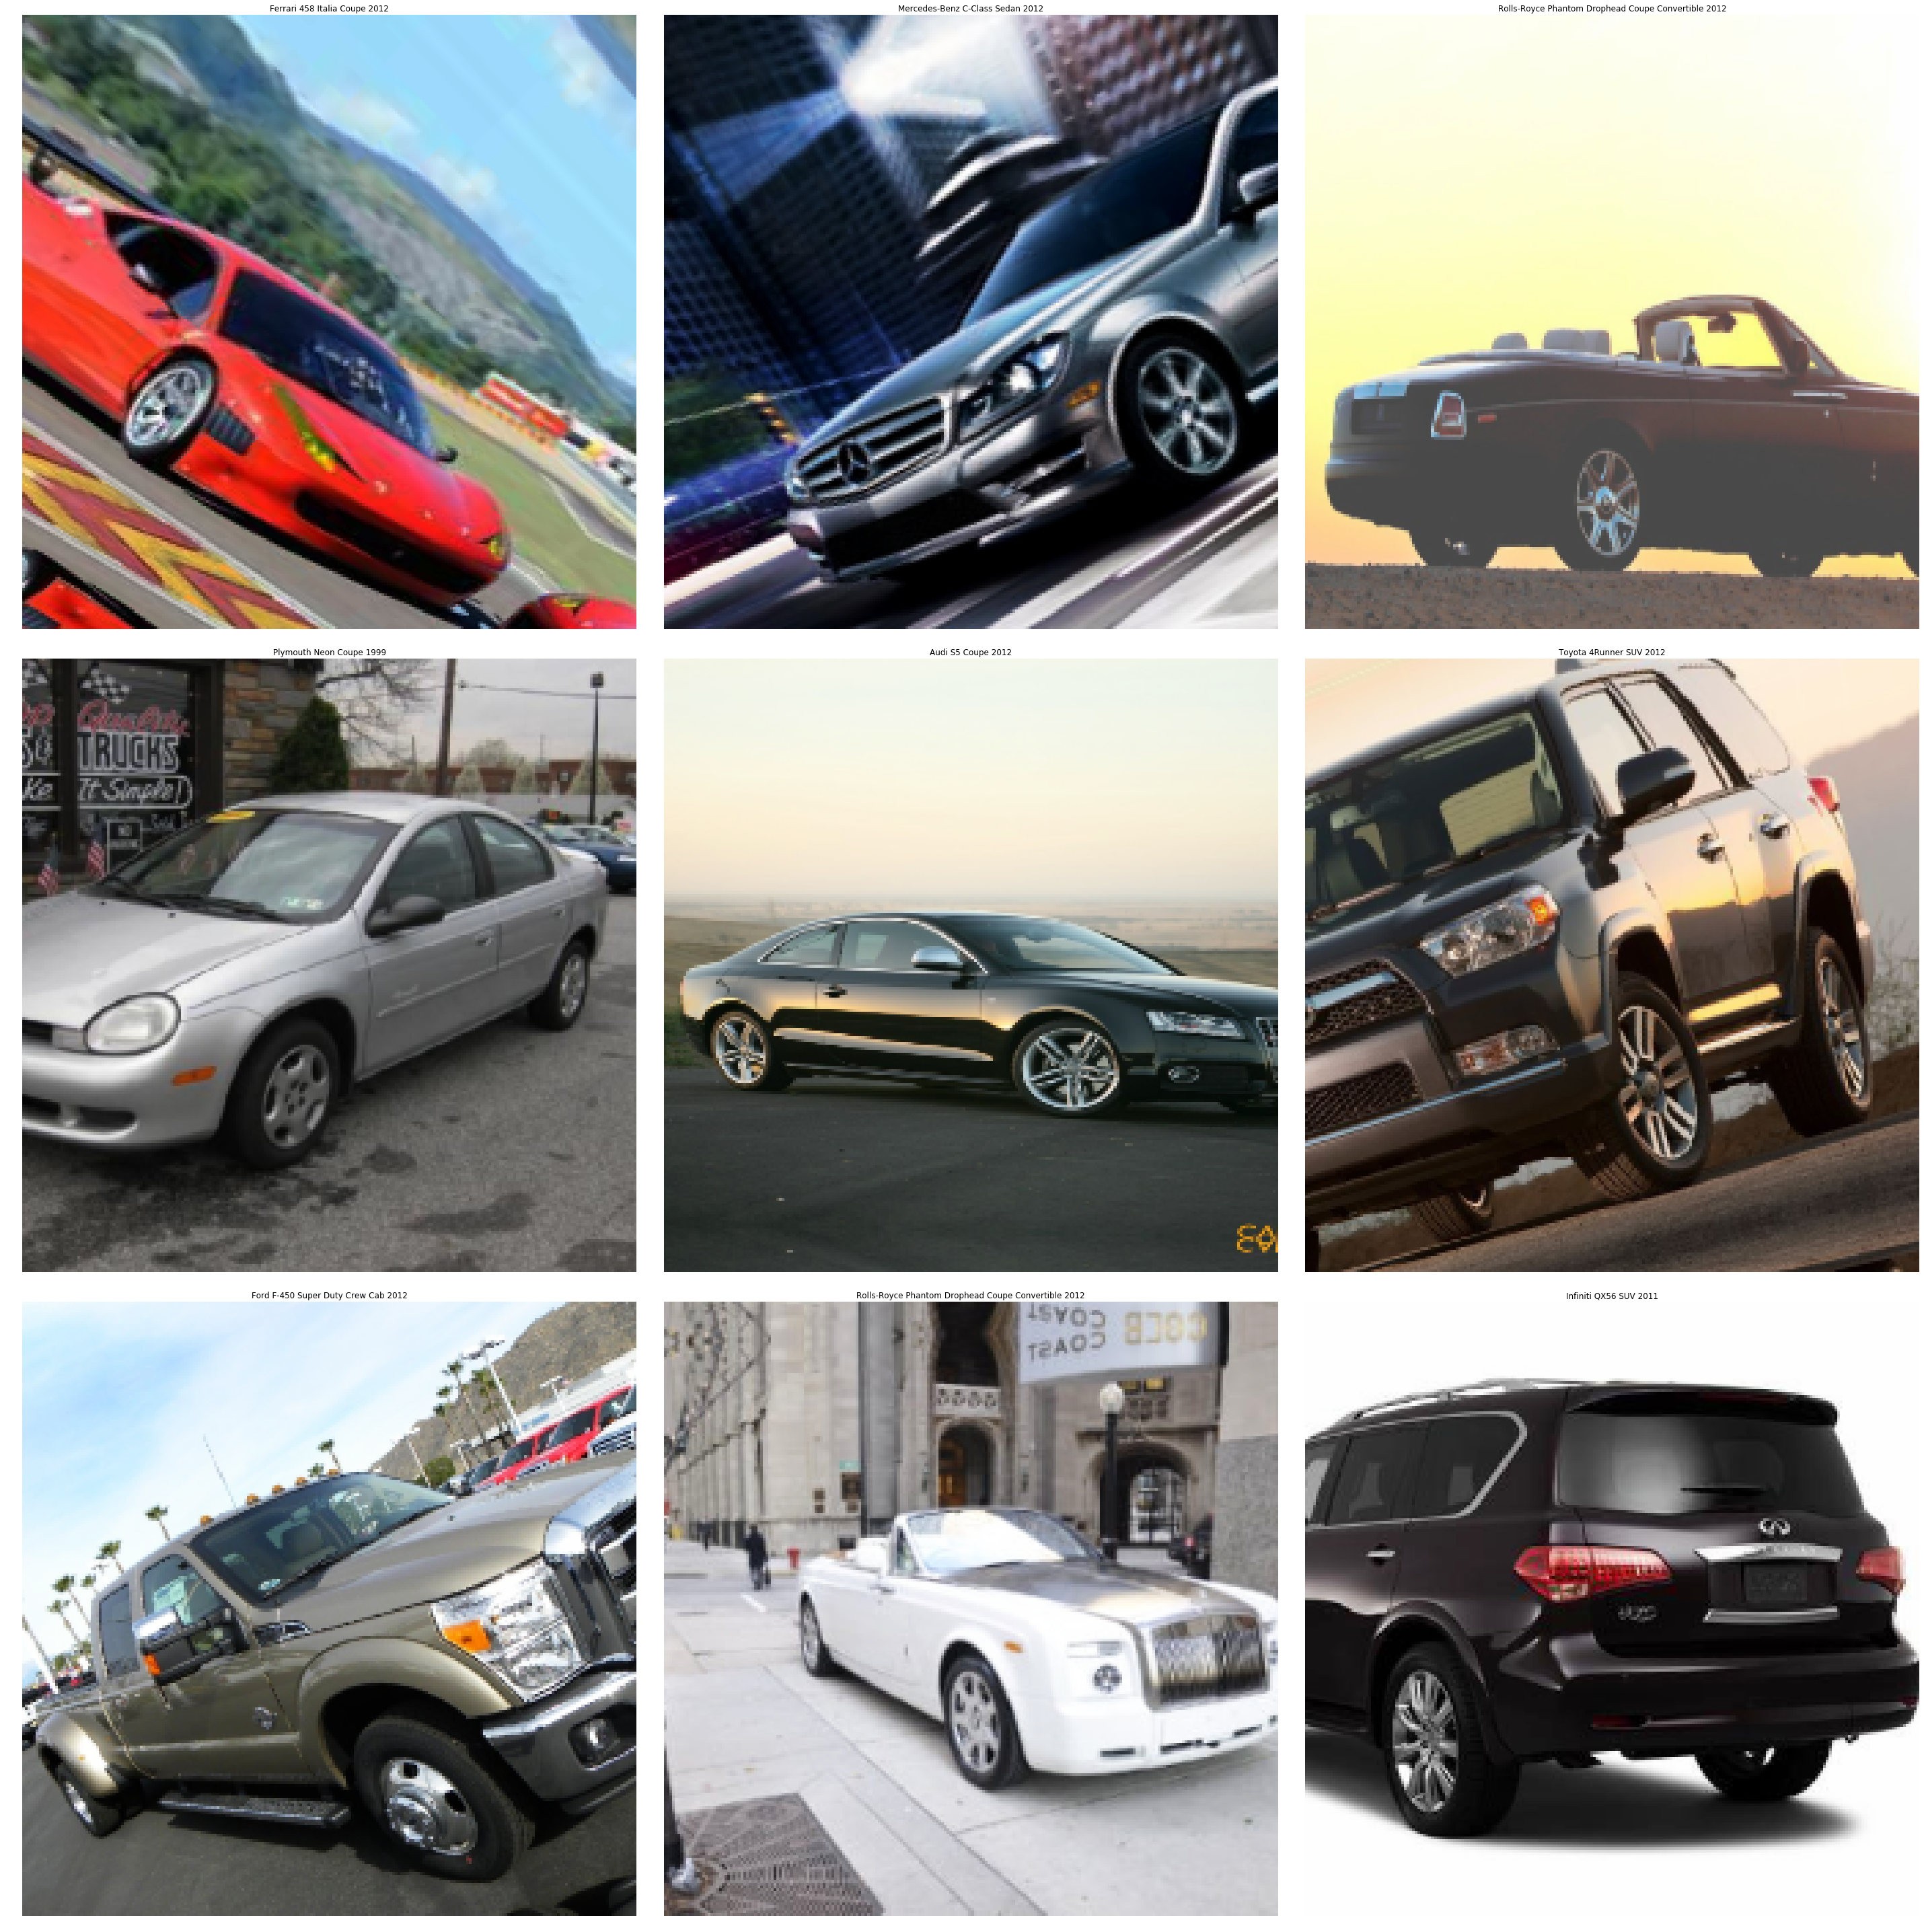

In [13]:
data.show_batch(rows=3, figsize=(40,40))

In [14]:
    print(data.classes)
len(data.classes)

['AM General Hummer SUV 2000', 'Acura Integra Type R 2001', 'Acura RL Sedan 2012', 'Acura TL Sedan 2012', 'Acura TL Type-S 2008', 'Acura TSX Sedan 2012', 'Acura ZDX Hatchback 2012', 'Aston Martin V8 Vantage Convertible 2012', 'Aston Martin V8 Vantage Coupe 2012', 'Aston Martin Virage Convertible 2012', 'Aston Martin Virage Coupe 2012', 'Audi 100 Sedan 1994', 'Audi 100 Wagon 1994', 'Audi A5 Coupe 2012', 'Audi R8 Coupe 2012', 'Audi RS 4 Convertible 2008', 'Audi S4 Sedan 2007', 'Audi S4 Sedan 2012', 'Audi S5 Convertible 2012', 'Audi S5 Coupe 2012', 'Audi S6 Sedan 2011', 'Audi TT Hatchback 2011', 'Audi TT RS Coupe 2012', 'Audi TTS Coupe 2012', 'Audi V8 Sedan 1994', 'BMW 1 Series Convertible 2012', 'BMW 1 Series Coupe 2012', 'BMW 3 Series Sedan 2012', 'BMW 3 Series Wagon 2012', 'BMW 6 Series Convertible 2007', 'BMW ActiveHybrid 5 Sedan 2012', 'BMW M3 Coupe 2012', 'BMW M5 Sedan 2010', 'BMW M6 Convertible 2010', 'BMW X3 SUV 2012', 'BMW X5 SUV 2007', 'BMW X6 SUV 2012', 'BMW Z4 Convertible 2012

196

In [17]:
learn = create_cnn(data, models.resnet34, metrics=accuracy, model_dir="/tmp/model/")

/home/adeeb/.local/lib/python3.6/site-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [18]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [19]:
learn.fit_one_cycle(10)

In [20]:
learn.save('stage-1')

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

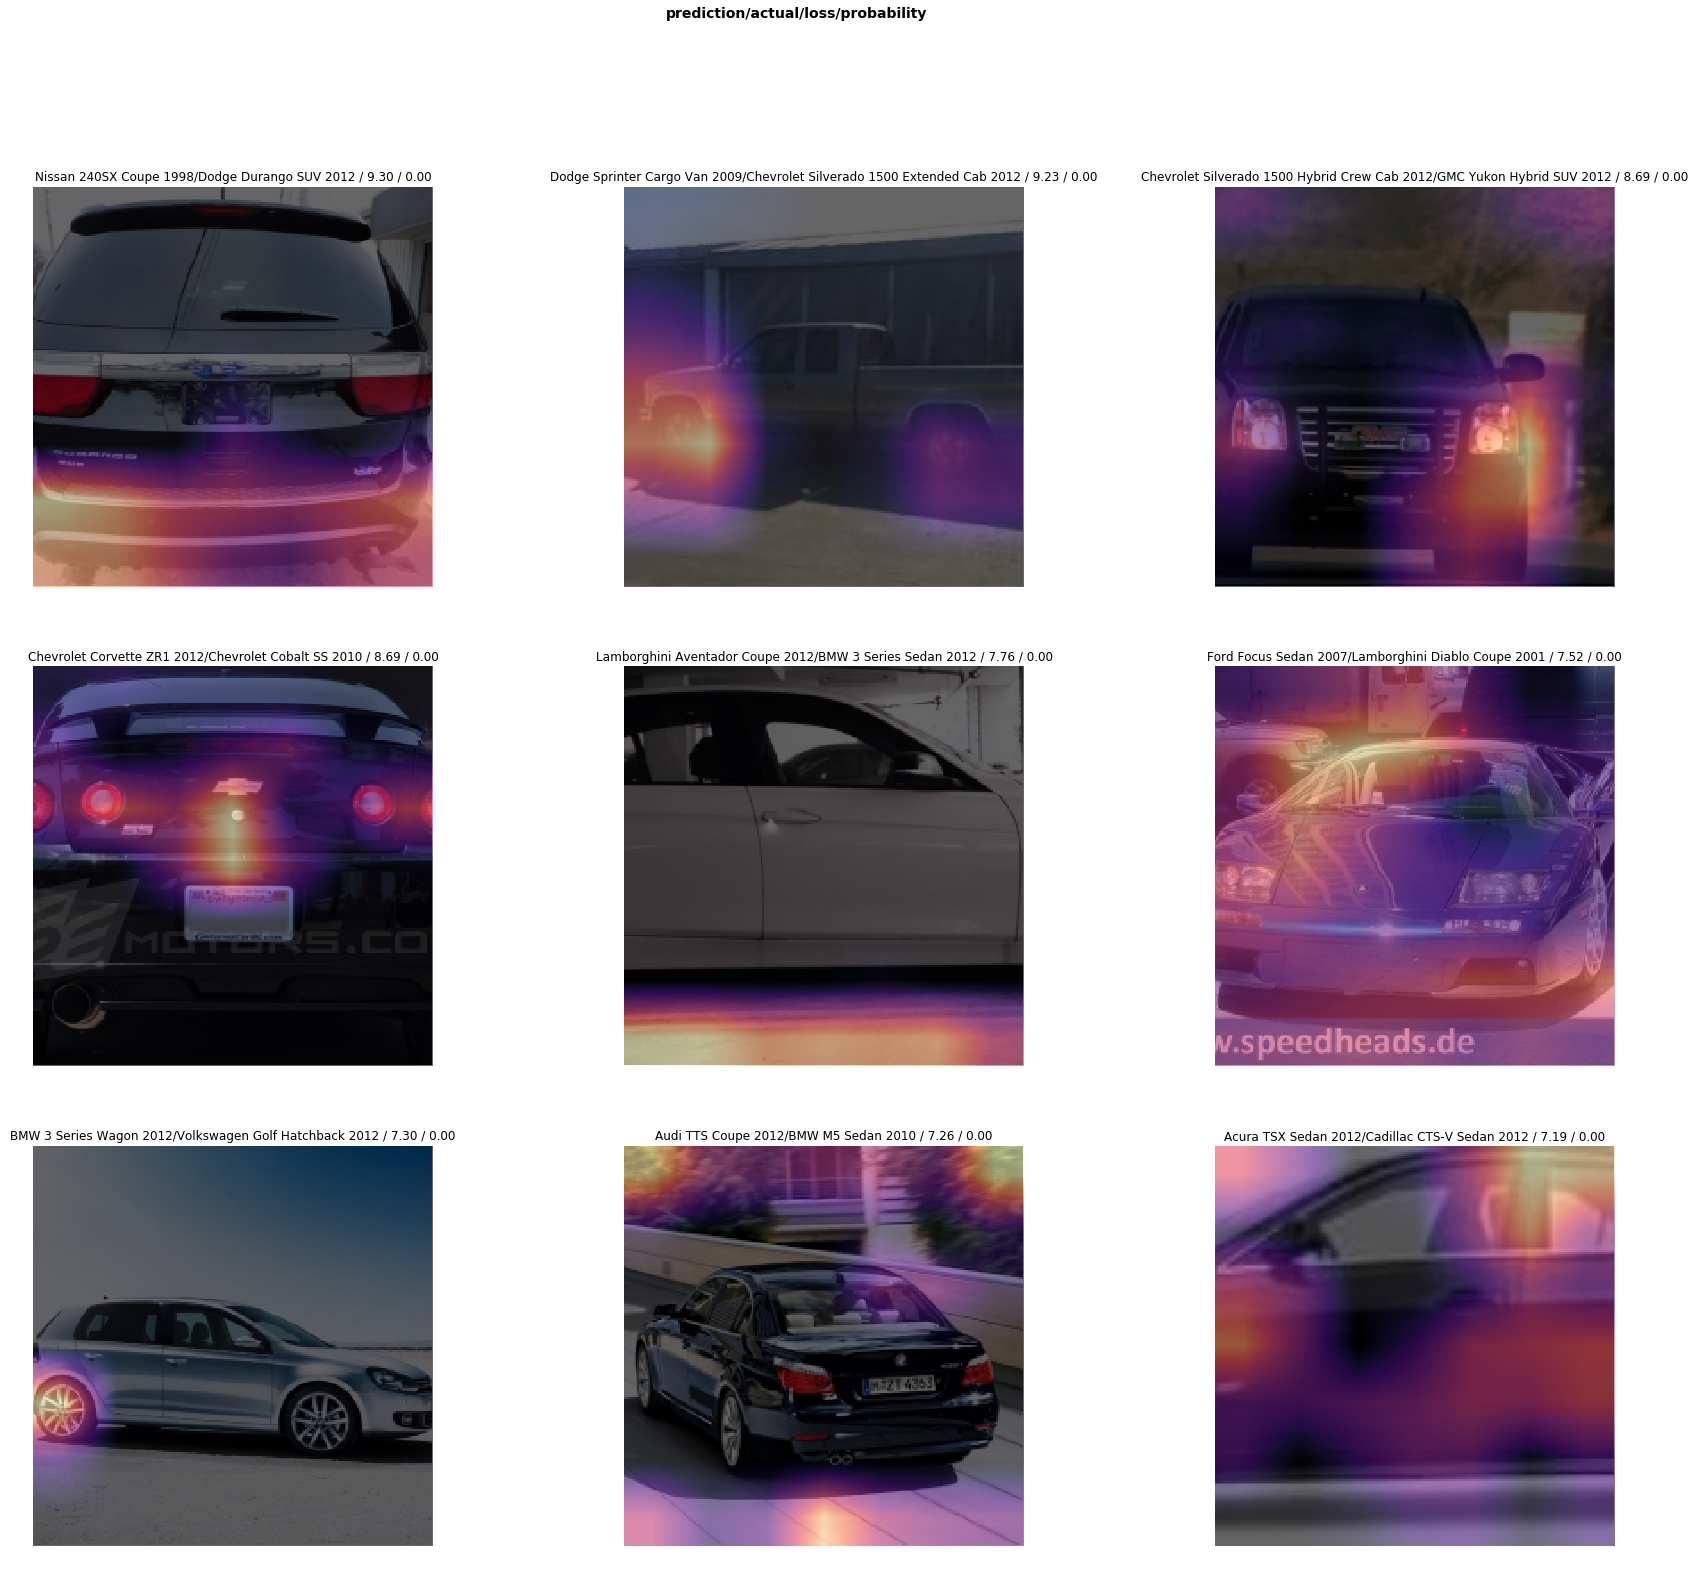

In [22]:
interp.plot_top_losses(9, figsize=(30,25))

In [23]:
interp.most_confused(min_val=2)

[('Audi 100 Wagon 1994', 'Audi 100 Sedan 1994', 8),
 ('Bentley Continental GT Coupe 2007',
  'Bentley Continental Flying Spur Sedan 2007',
  7),
 ('Dodge Sprinter Cargo Van 2009', 'Mercedes-Benz Sprinter Van 2012', 7),
 ('Acura TSX Sedan 2012', 'Acura TL Sedan 2012', 6),
 ('Audi TTS Coupe 2012', 'Audi TT Hatchback 2011', 6),
 ('Dodge Caliber Wagon 2012', 'Dodge Caliber Wagon 2007', 6),
 ('Audi A5 Coupe 2012', 'Audi S5 Coupe 2012', 5),
 ('Audi S4 Sedan 2007', 'Audi S6 Sedan 2011', 5),
 ('Chevrolet Express Van 2007', 'GMC Savana Van 2012', 5),
 ('Mercedes-Benz Sprinter Van 2012', 'Dodge Sprinter Cargo Van 2009', 5),
 ('Rolls-Royce Ghost Sedan 2012', 'Rolls-Royce Phantom Sedan 2012', 5),
 ('Rolls-Royce Phantom Drophead Coupe Convertible 2012',
  'Rolls-Royce Phantom Sedan 2012',
  5),
 ('Audi S4 Sedan 2012', 'Audi A5 Coupe 2012', 4),
 ('Audi TT Hatchback 2011', 'Audi TT RS Coupe 2012', 4),
 ('Audi V8 Sedan 1994', 'Audi 100 Wagon 1994', 4),
 ('Bentley Continental GT Coupe 2007', 'Bentley C

Unfreezing, fine-tuning, and learning rates

In [24]:
learn.unfreeze()

In [25]:
learn.fit_one_cycle(2)

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


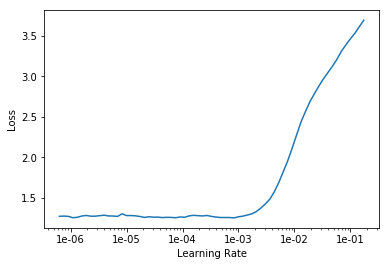

In [27]:

learn.recorder.plot()

In [28]:
learn.unfreeze() 
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

In [29]:
learn.save('stage-2')

In [30]:
interp = ClassificationInterpretation.from_learner(learn)

In [31]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

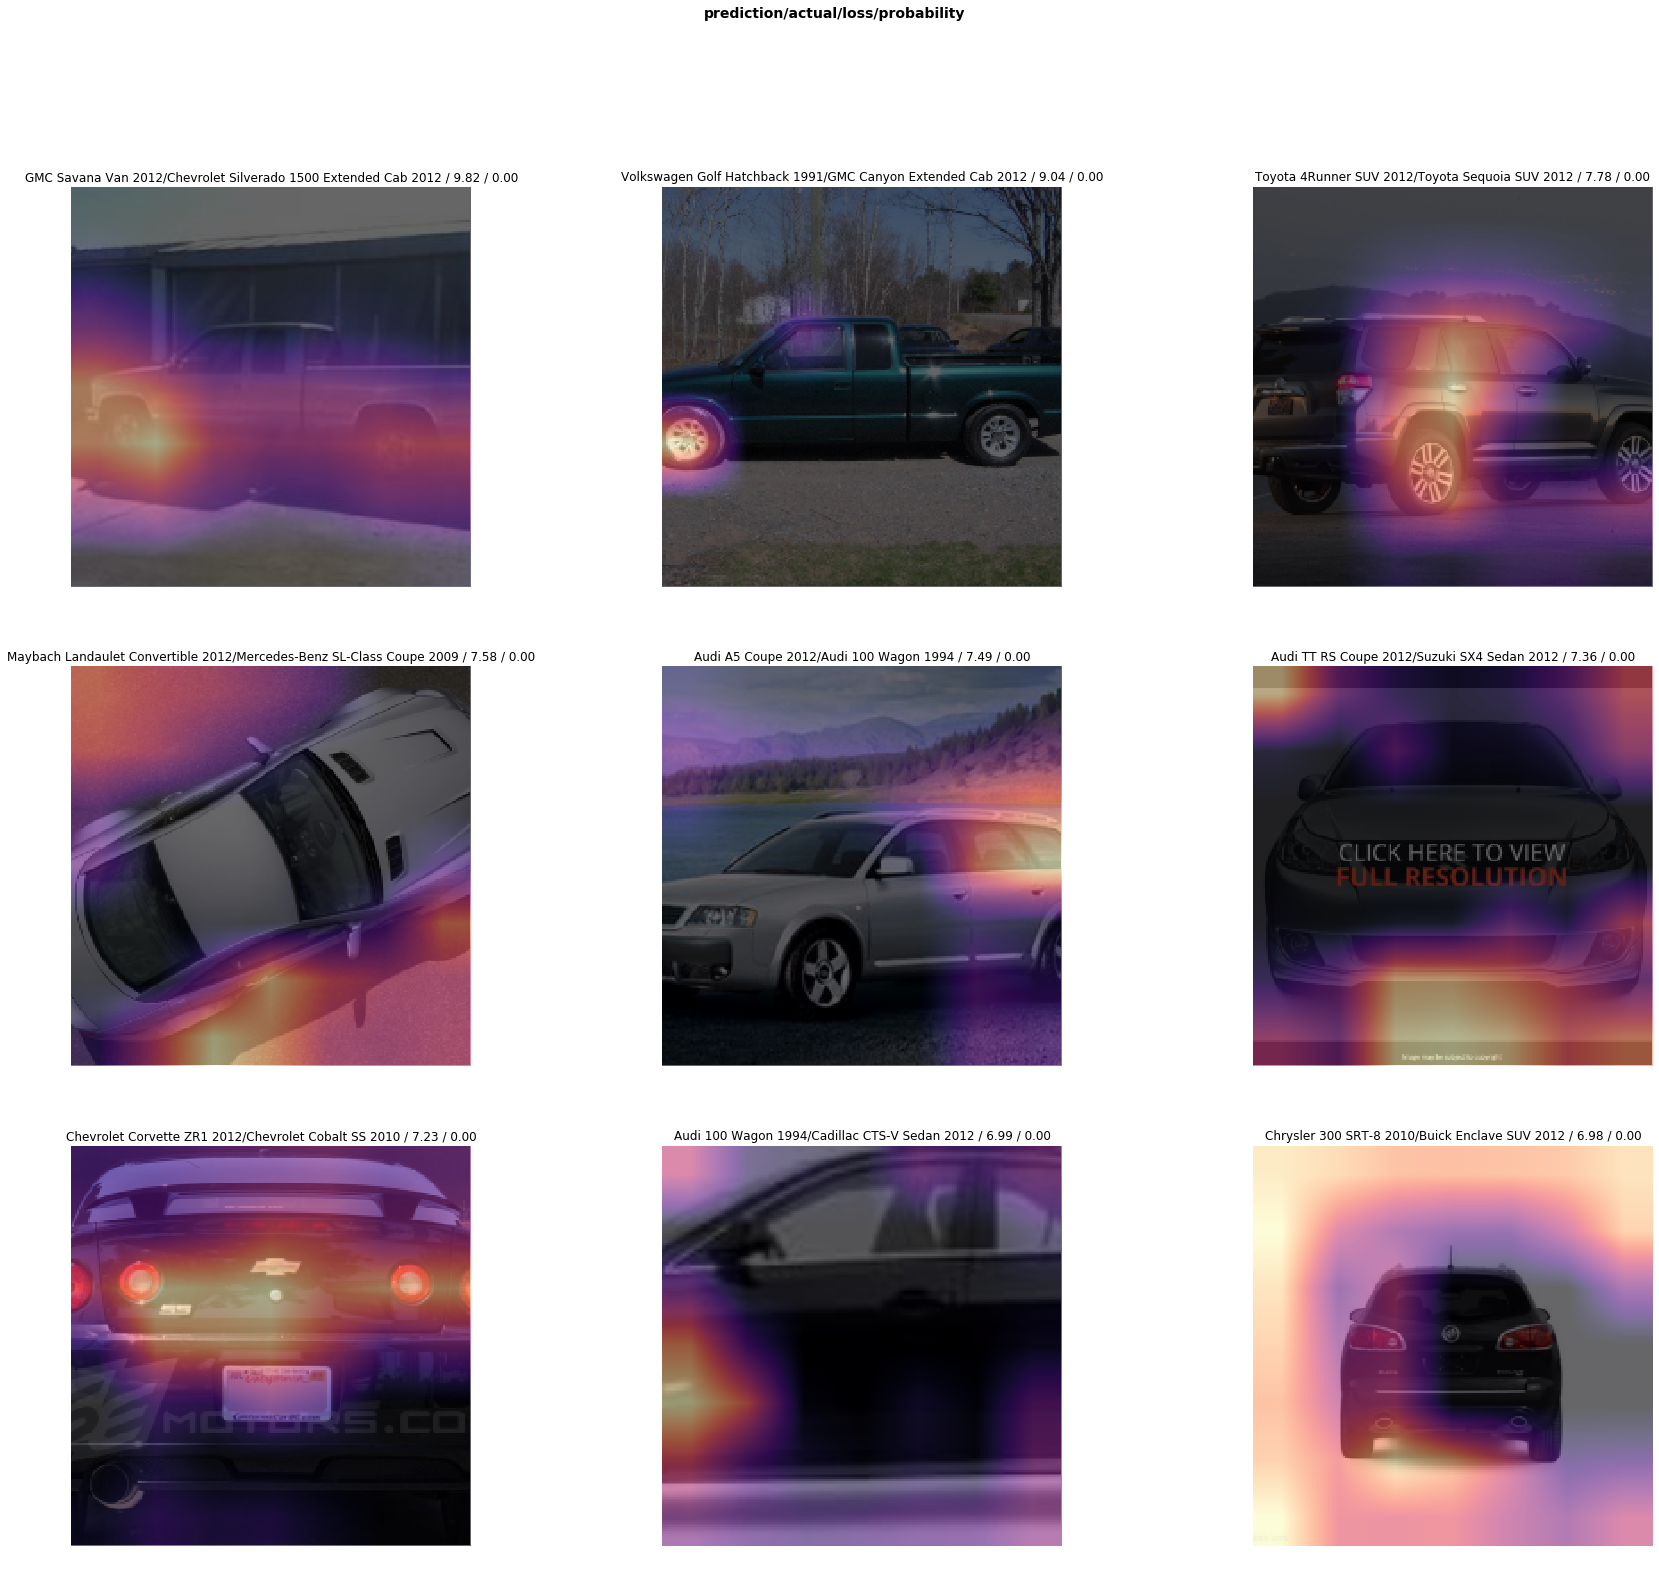

In [32]:
interp.plot_top_losses(9, figsize=(30,25))